# Test

In [71]:
internet_service_cols = [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
]

In [72]:
cleaned_df.InternetService.value_counts(normalize=True)

Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: InternetService, dtype: float64

In [73]:
internet_service_yes_df = cleaned_df[cleaned_df.InternetService != "No"]

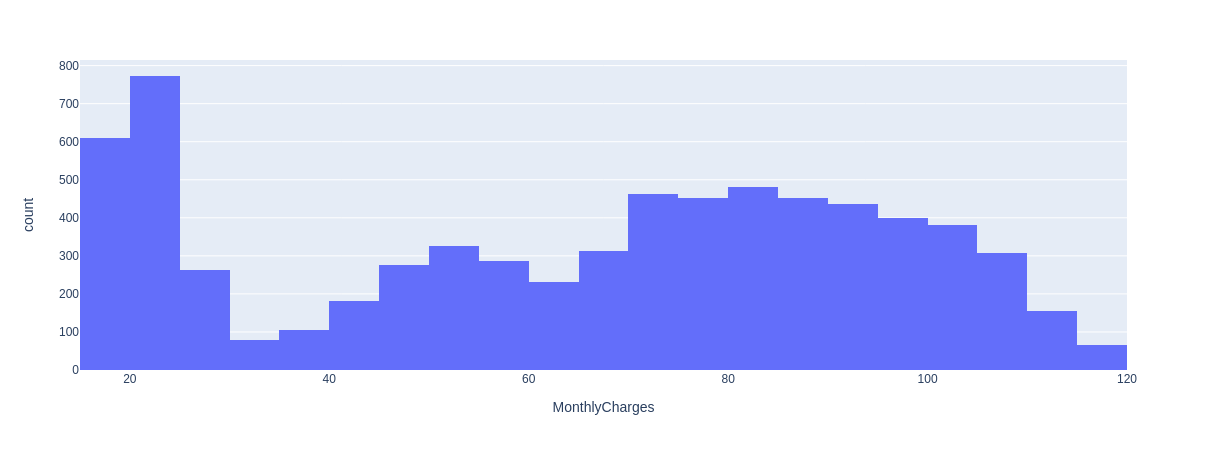

In [74]:
px.histogram(data_frame=cleaned_df, x="MonthlyCharges", nbins=30)

In [75]:
df2 = cleaned_df.copy()

In [76]:
df2["MonthlyChargesBins"] = pd.cut(df2.MonthlyCharges, bins=30)

In [77]:
df2.MonthlyChargesBins = df2.MonthlyChargesBins.map(lambda x: str(x))

In [78]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargesBins
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,"(28.3, 31.65]"
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,"(55.1, 58.45]"
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"(51.75, 55.1]"
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,"(41.7, 45.05]"
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,"(68.5, 71.85]"


In [79]:
df2 = df2[df2.InternetService != "No"]

In [80]:
df2[internet_service_cols] = df2[internet_service_cols].eq("Yes").mul(1)

In [81]:
df3 = df2.groupby(by=["MonthlyChargesBins", "Churn"], as_index=False)[
    internet_service_cols
].sum()

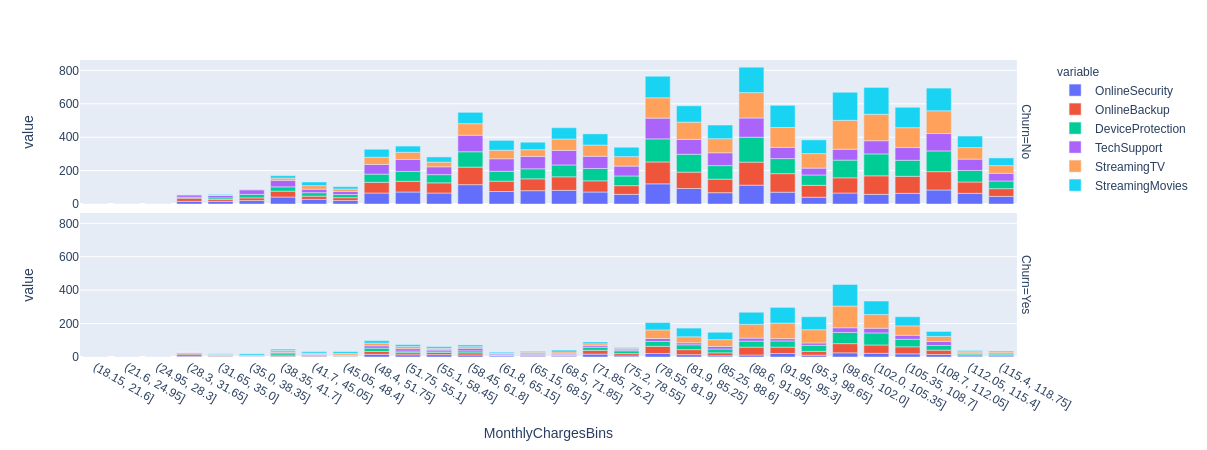

In [82]:
fig = px.bar(
    data_frame=df3, x="MonthlyChargesBins", y=internet_service_cols, facet_row="Churn"
)

fig.show()

# Test2

In [83]:
temp_df = cleaned_df.copy()

In [84]:
temp_df["TotalChargesBins"] = pd.cut(temp_df.TotalCharges, bins=30).map(
    lambda x: str(x)
)

In [85]:
temp_df[internet_service_cols] = temp_df[internet_service_cols].eq("Yes").mul(1)

In [86]:
temp_df = temp_df.groupby(by=["TotalChargesBins", "Churn"], as_index=False)[
    internet_service_cols
].sum()

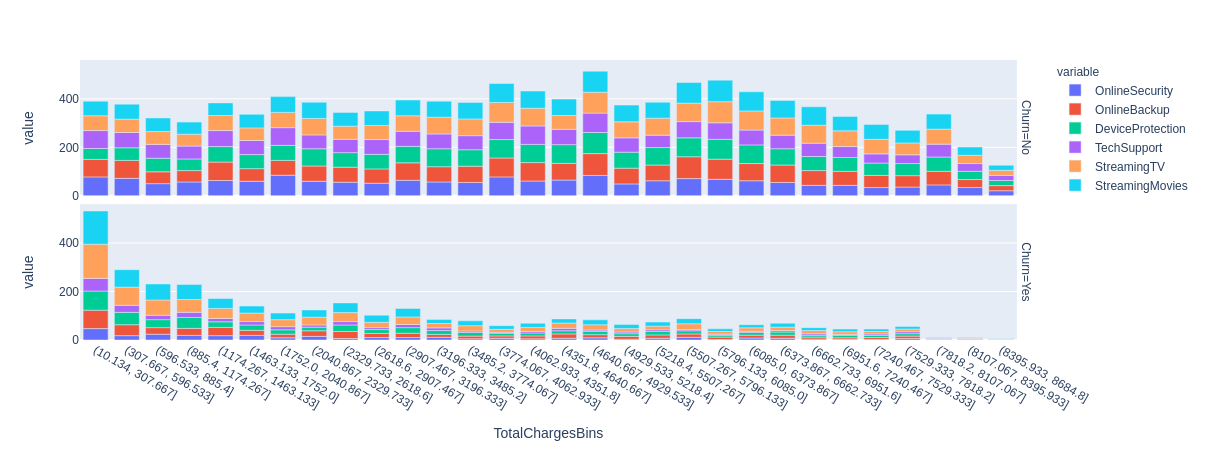

In [87]:
fig = px.bar(data_frame=temp_df, x="TotalChargesBins", y=internet_service_cols, facet_row='Churn')

fig.show()